In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head() #test_result: 0 = fail, 1 = pass

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


Exploratory Data Analysis:

In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

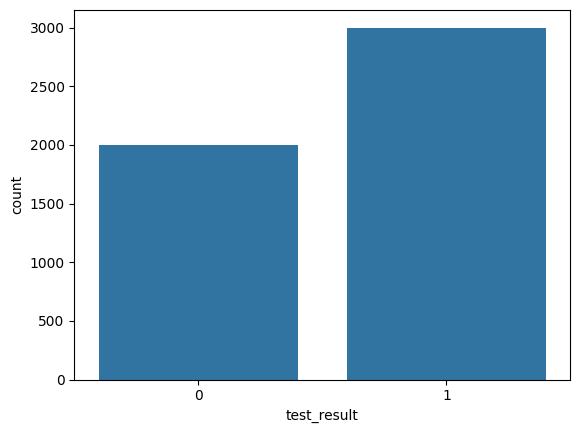

In [6]:
sns.countplot(data = df, x = 'test_result')

<Axes: xlabel='test_result', ylabel='age'>

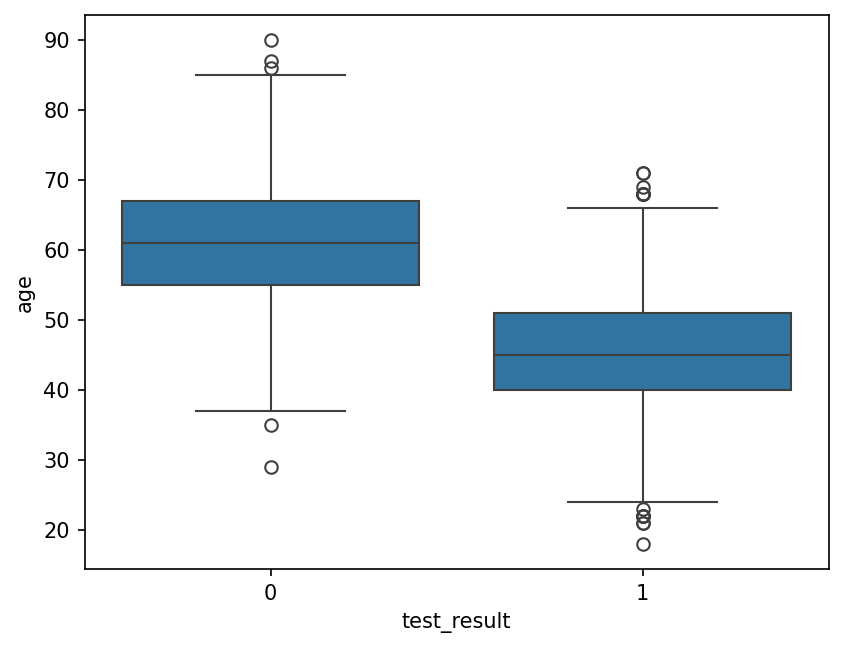

In [7]:
plt.figure(dpi = 150)
sns.boxplot(x = 'test_result', y = 'age', data = df)

<Axes: xlabel='test_result', ylabel='physical_score'>

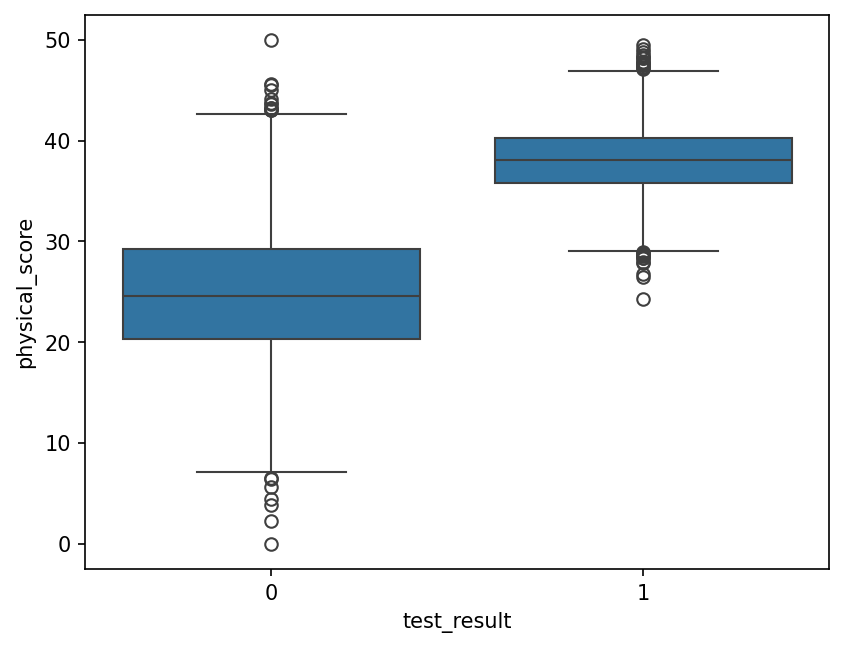

In [8]:
plt.figure(dpi = 150)
sns.boxplot(x = 'test_result', y = 'physical_score', data = df)

<Axes: xlabel='age', ylabel='physical_score'>

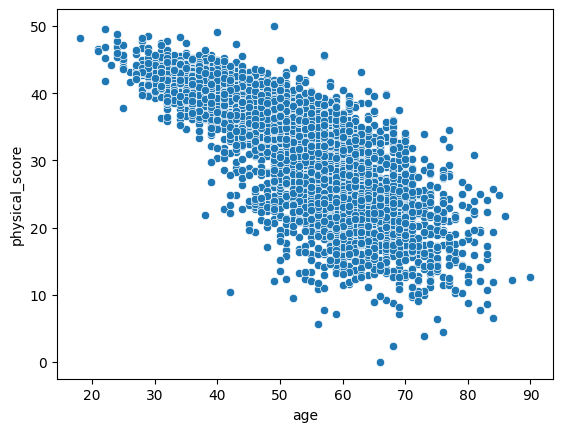

In [9]:
sns.scatterplot(x = 'age', y = 'physical_score', data = df)

<Axes: xlabel='age', ylabel='physical_score'>

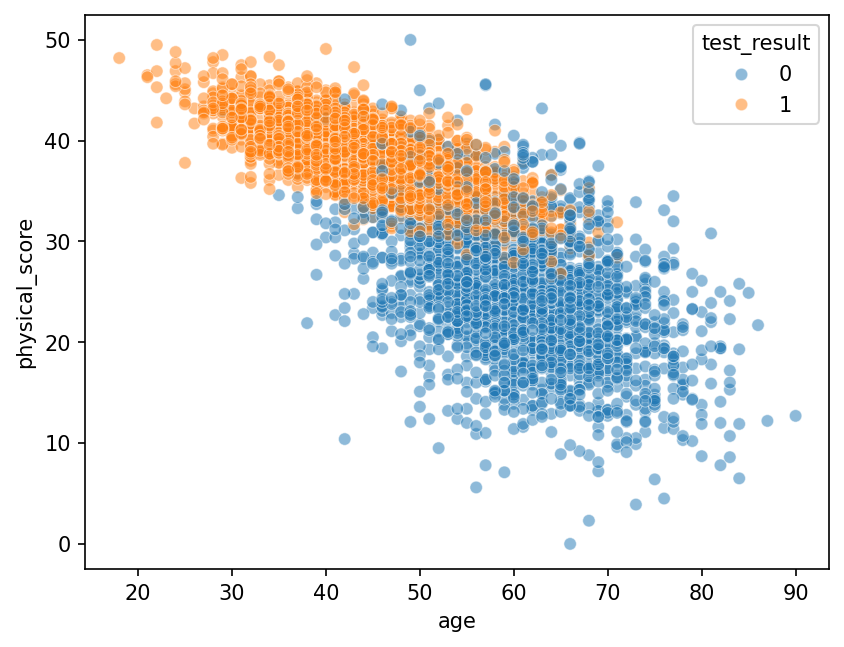

In [10]:
plt.figure(dpi = 150)
sns.scatterplot(x = 'age', y = 'physical_score', data = df, hue = 'test_result', alpha = 0.5)

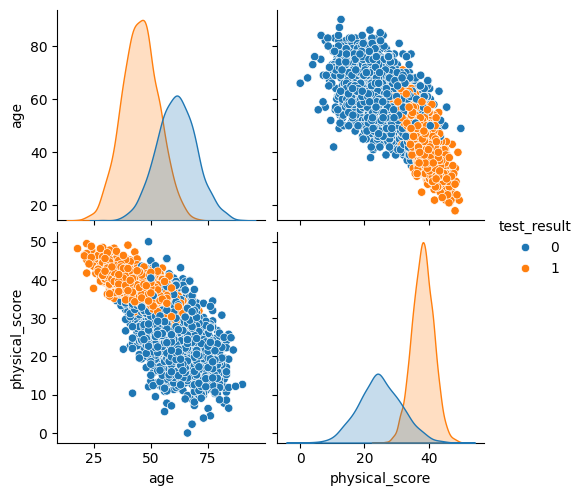

In [11]:
sns.pairplot(df, hue = 'test_result') #This is recommended for classification problems

<Axes: >

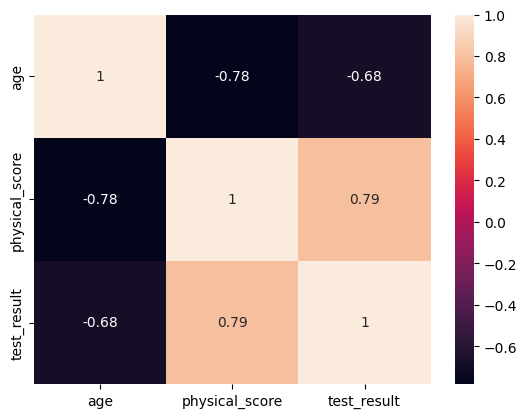

In [12]:
sns.heatmap(df.corr(), annot = True)

Less Informative Plots:

<Axes: xlabel='physical_score', ylabel='test_result'>

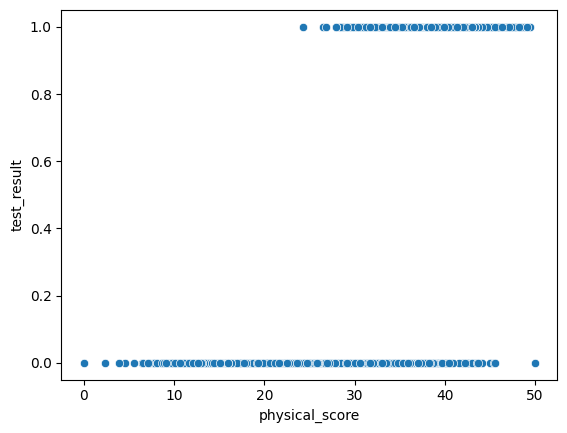

In [13]:
sns.scatterplot(x = 'physical_score', y = 'test_result', data = df)
#If you get a plot like this, a box plot or the below 3d scatterplot would be better

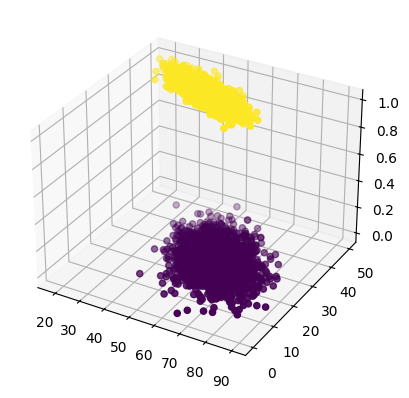

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c = df['test_result'])

Data Preparation:

In [15]:
X = df.drop('test_result', axis = 1)

In [16]:
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)

In [22]:
scaled_X_test = scaler.transform(X_test)

Creating A Logistic Regression Model:

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be converted
 |  (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solvers s

In [25]:
log_model = LogisticRegression() #Creating a default logistic regression model
#Note: Despite the name, logistic regression is used for classification problems rather than regression problems!

In [26]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [28]:
y_pred = log_model.predict(scaled_X_test)

In [29]:
y_pred #As this model is designed for classification, the predictions are only 0's and 1's

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [30]:
y_prob = log_model.predict_proba(scaled_X_test)
#You can also predict the probability of each entry belonging to the 1 class

In [31]:
y_prob

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

Classification Performance Metrics:

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred) #Accuracy isn't always the best performance metric for classification models

0.93

In [ ]:
confusion_matrix(y_test, y_pred)
#Top-Left = True Positives
#Bottom-Left = False Positives
#Top-Right = False Negatives
#Bottom-Right = True Negatives

array([[172,  21],
       [ 14, 293]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix #Removed and replaced with ConfusionMatrixDisplay!

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\Jake\Documents\Udemy Courses\Machine Learning Recap Course\.venv\Lib\site-packages\sklearn\metrics\__init__.py)

In [38]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay #3 ways to plot with new import

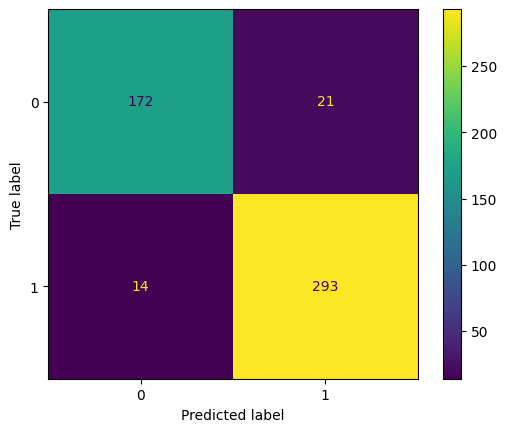

In [ ]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = log_model.classes_).plot()
#Using confusion matrix

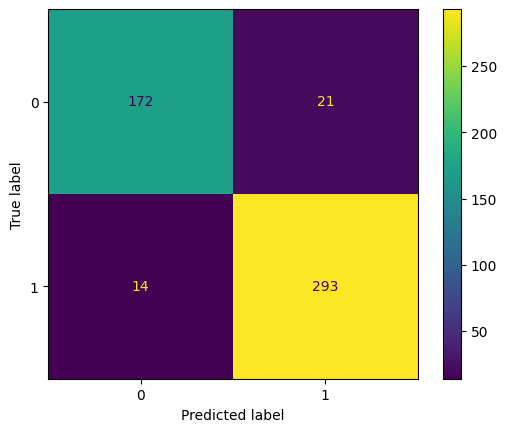

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)
#Using ML model; similar to the old module

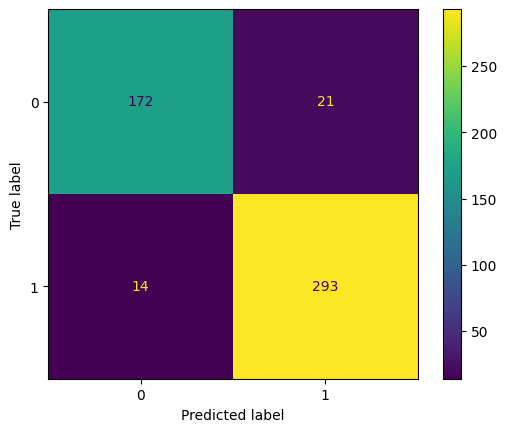

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#Using predictions

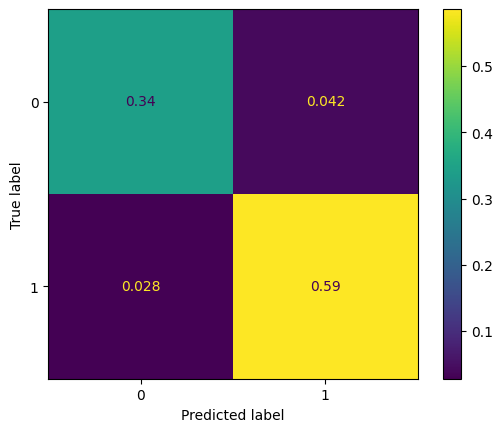

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize = 'all')
#You can normalize the confusion matrix display to certain portions of the population

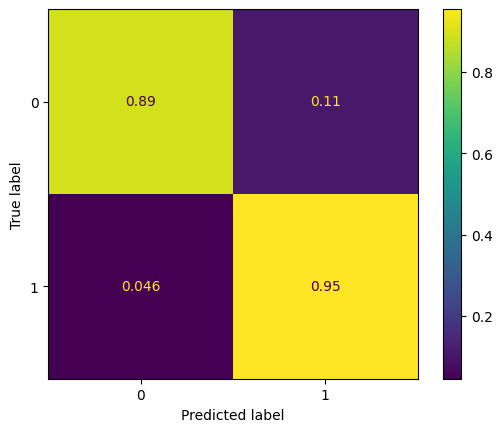

In [48]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize = 'true')

In [ ]:
classification_report(y_test, y_pred) #Note: You have to explicitly print this, as this is a string

'              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.91       193\n           1       0.93      0.95      0.94       307\n\n    accuracy                           0.93       500\n   macro avg       0.93      0.92      0.93       500\nweighted avg       0.93      0.93      0.93       500\n'

In [ ]:
print(classification_report(y_test, y_pred)) #Provides information about your model's precision, recall, f1-score, and support per class
#Recall - How many of this class are you finding over the whole number of elements of this class
#Precision - How many are correctly classified among the class
#F1-Score - Harmonic mean between precision and recall
#Support - How many specific instances you had of each class in this test set

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [51]:
from sklearn.metrics import precision_score, recall_score

In [52]:
precision_score(y_test, y_pred) #This gets the overall precision, not by class

0.9331210191082803

In [53]:
recall_score(y_test, y_pred) #Same as above, but for recall

0.9543973941368078

In [ ]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve #Also removed!

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (c:\Users\Jake\Documents\Udemy Courses\Machine Learning Recap Course\.venv\Lib\site-packages\sklearn\metrics\__init__.py)

In [67]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

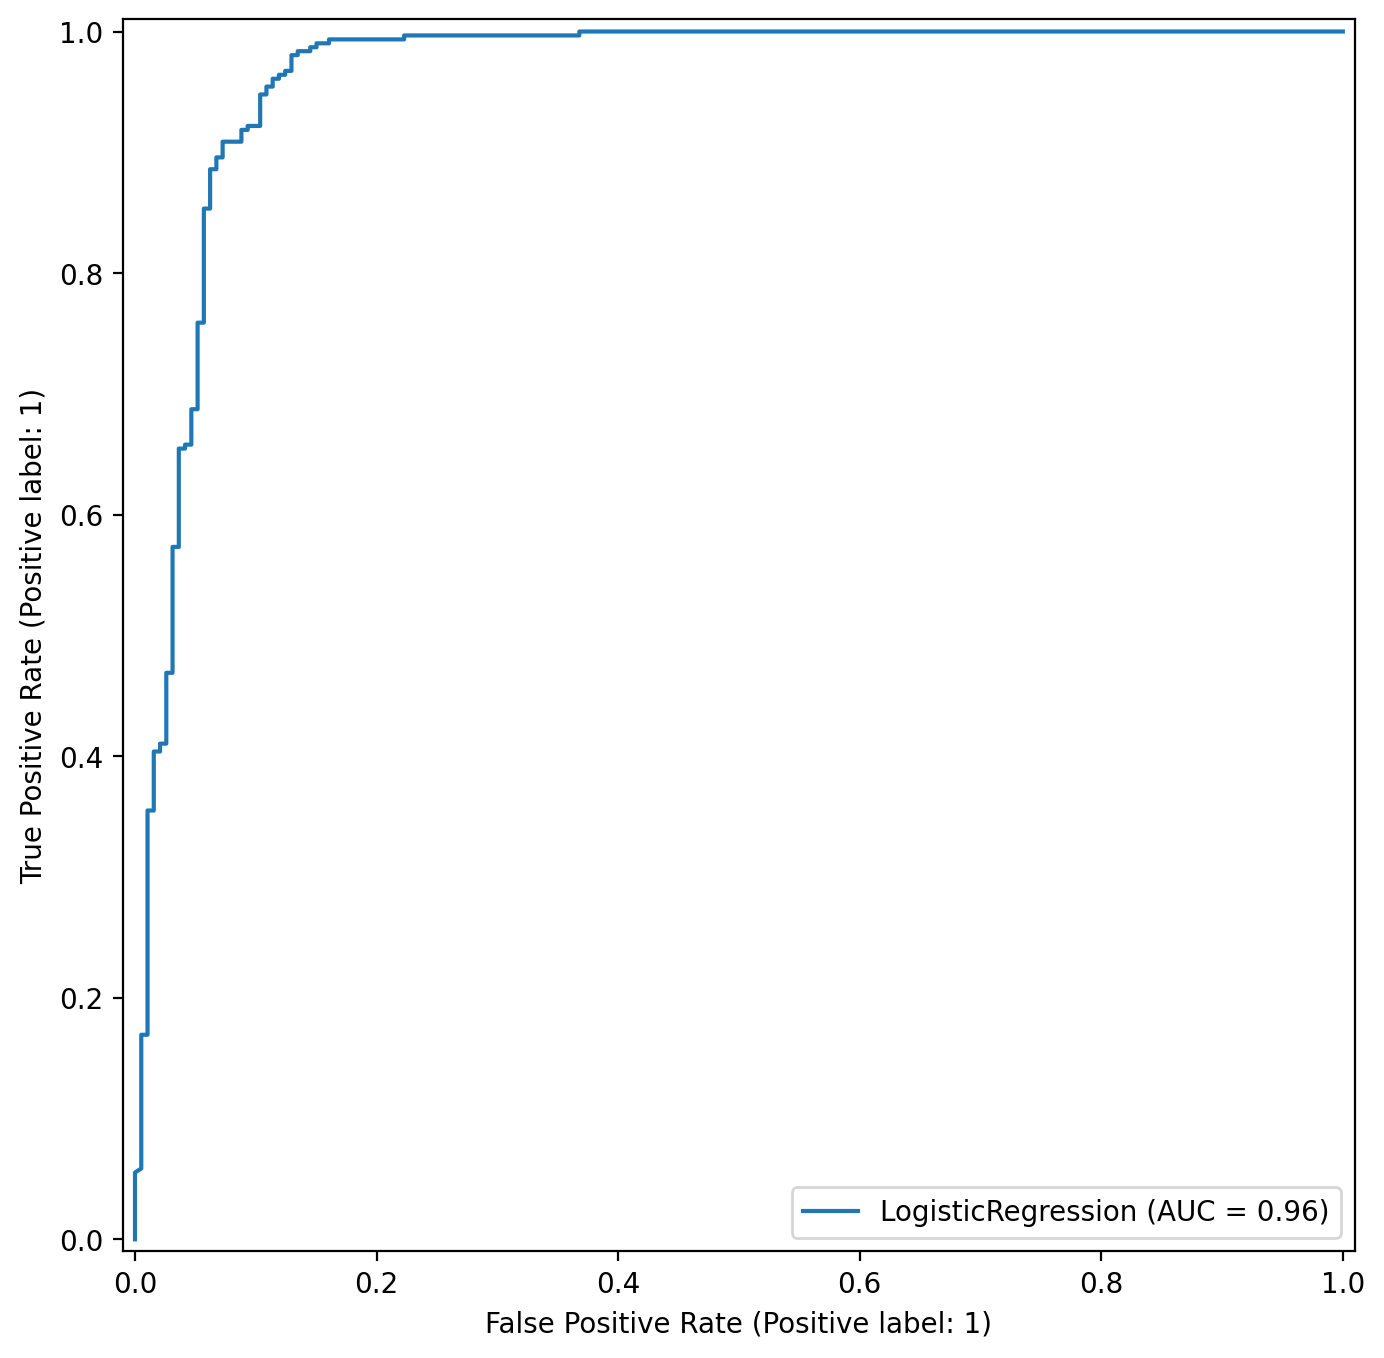

In [65]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 200)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax = ax) #Has the same 3 modes as ConfusionMatrixDisplay

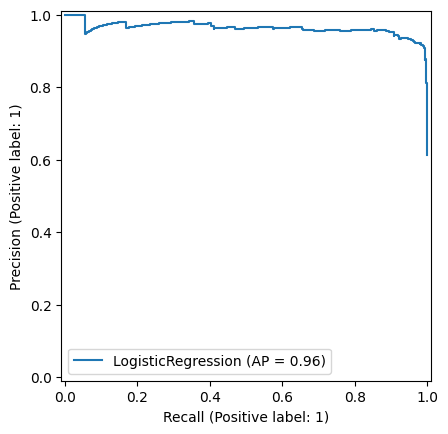

In [ ]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test) #Same 3 as above

In [ ]:
log_model.predict_proba(scaled_X_test)

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [71]:
log_model.predict_proba(scaled_X_test)[0] #Probabilities for a single point can also be calculated

array([0.02380517, 0.97619483])

In [72]:
y_test[0]

np.int64(1)